<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# 1. Wine dataset
From sklearn website:
*The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.*

3 classes - for 3 types of wine

### Features:

In [3]:
wine_data = load_wine()
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

All features, except magnesium integer, are continuous.

## 1.1
### Consider wine data, split data into train and test datasets, use scikit-learn split method.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size=0.25)

print(len(X_train[0]))
print(X_train)
print(y_train)

13
[[1.305e+01 2.050e+00 3.220e+00 ... 1.130e+00 3.200e+00 8.300e+02]
 [1.208e+01 1.330e+00 2.300e+00 ... 1.070e+00 3.210e+00 6.250e+02]
 [1.293e+01 2.810e+00 2.700e+00 ... 7.700e-01 2.310e+00 6.000e+02]
 ...
 [1.386e+01 1.510e+00 2.670e+00 ... 1.360e+00 3.160e+00 4.100e+02]
 [1.237e+01 1.130e+00 2.160e+00 ... 1.220e+00 2.870e+00 4.200e+02]
 [1.340e+01 3.910e+00 2.480e+00 ... 7.000e-01 1.560e+00 7.500e+02]]
[0 1 2 0 2 2 2 2 2 1 2 2 0 0 1 1 1 2 1 1 0 1 0 1 0 1 2 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 2 2 2 1 0 0 1 1 1 0 1 2 1 0 0 2 1 0 0 0 1 1 2 2 0 0 1 0 0 0 2 1 2
 0 2 1 1 0 0 2 0 2 0 0 0 2 1 0 0 2 2 2 0 0 1 1 1 2 0 2 1 0 1 2 2 1 2 0 1 1
 2 1 2 1 1 2 1 1 1 0 1 1 2 1 1 2 1 0 1 1 1 2]


## 1.2

### Analyze data (plot relations between features 2D triangle plot)

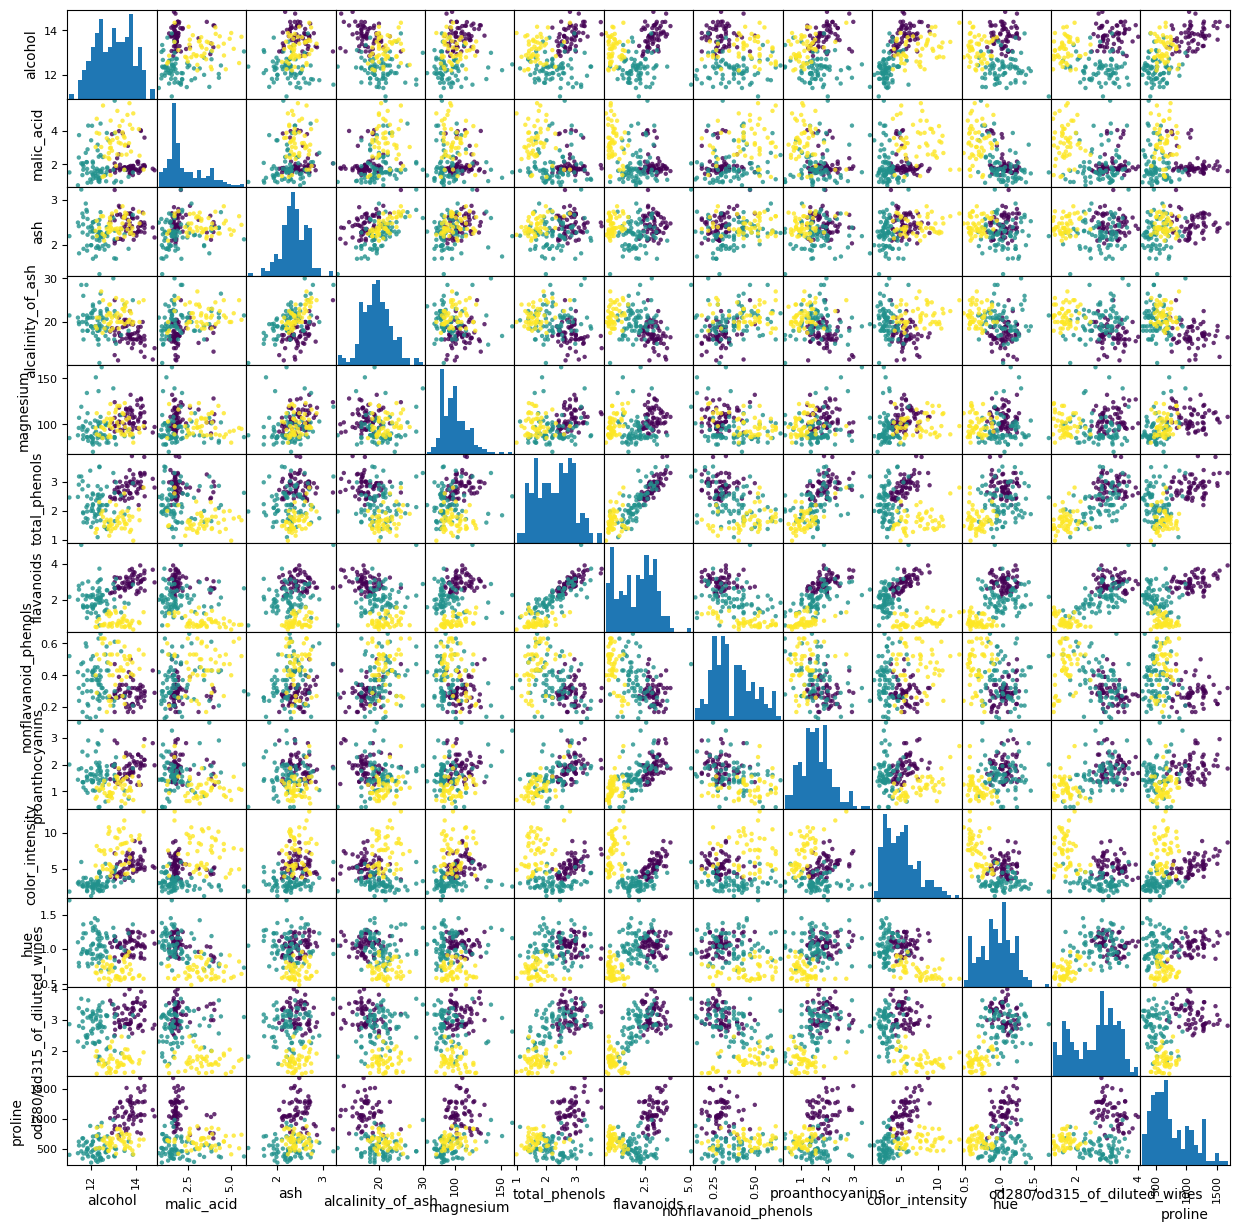

In [5]:
list_dataframe = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
alltogether = pd.plotting.scatter_matrix(list_dataframe, c = wine_data.target, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=10,alpha=0.8)

## 1.3
### Plot3D of the samples, distingwish beteen three classes, consider various combinations of features.

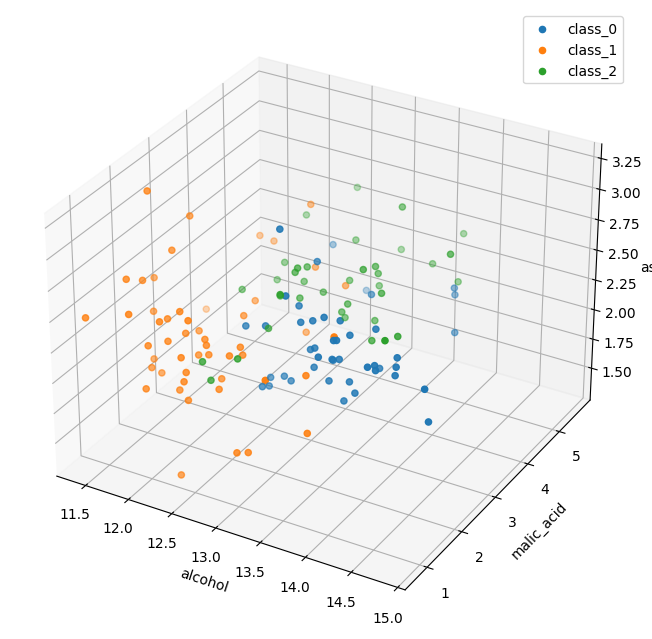

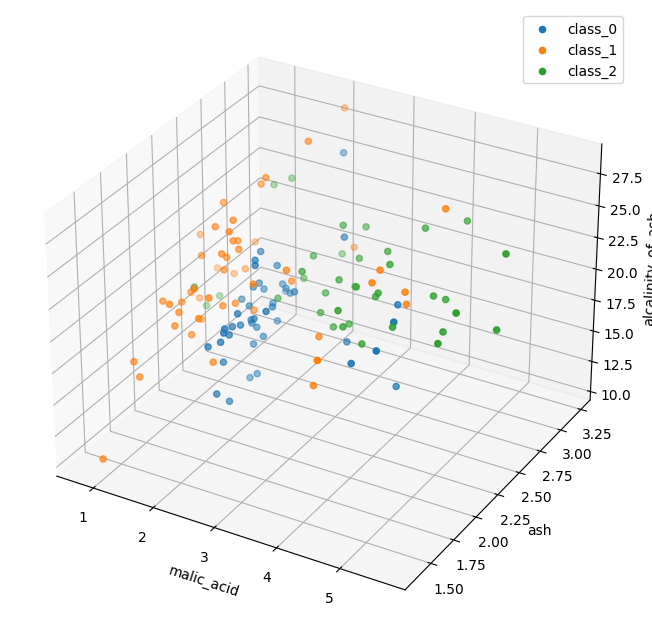

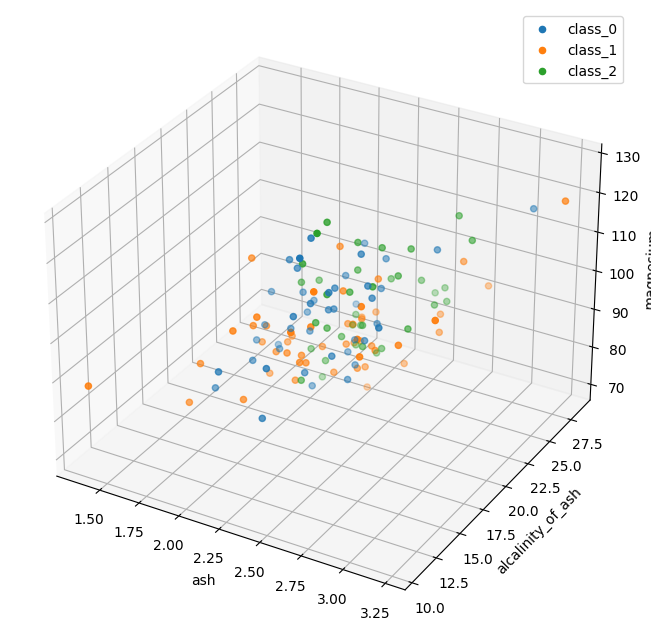

In [6]:
for i in range(3):
  fig = plt.figure(figsize=(8, 10))
  ax = fig.add_subplot(111, projection='3d')
  for j in range(3):
      ax.scatter(X_train[y_train == j, i], X_train[y_train == j, i+1], X_train[y_train == j, i+2], label=f'class_{j}')
  ax.set_xlabel(wine_data.feature_names[i])
  ax.set_ylabel(wine_data.feature_names[i+1])
  ax.set_zlabel(wine_data.feature_names[i+2])
  ax.legend()
  plt.show()

In [7]:
fig = go.Figure()

for j in range(3):
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train == j, 4],
        y=X_train[y_train == j, 5],
        z=X_train[y_train == j, 6],
        mode='markers',
        marker=dict(size=3),
        name=f'class_{j}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title=wine_data.feature_names[4],
        yaxis_title=wine_data.feature_names[5],
        zaxis_title=wine_data.feature_names[6]
    )
)

fig.show()

## 1.4
### Use PCA and then plot 3D again.

PCA stands for Principal Component Analysis. It is a dimensionality reduction technique used to simplify complex datasets while preserving important information. Algorithm:


1. Calculate covariance matrix, that describes the relationships between different features in the original dataset.
2. Compute the eigenvectors and eigenvalues of the covariance matrix.
3. Select eigenvectors with the highest eigenvalues as the principal components.
4. Project the original data onto the principal components

New shape: (133, 3)


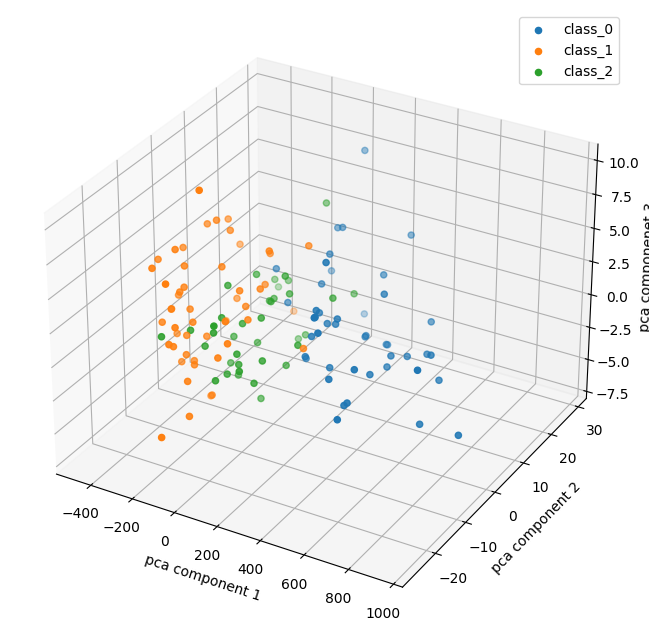

In [8]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
print("New shape:", X_train_pca.shape)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for j in range(3):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1], X_train_pca[y_train == j, 2], label=f'class_{j}')
ax.set_xlabel('pca component 1')
ax.set_ylabel('pca component 2')
ax.set_zlabel('pca componenet 3')
ax.legend()
plt.show()

## 1.5
### Use K-mean algorithm for clustering the data.

K-means algorithm:
1. Choose the number of clusters K, randomly initialize K centroids.
Randomly initialize K centroids.
2. For each data point, calculate the distance to each centroid. Assign the data point to the nearest centroid, forming K clusters.
3. Calculate the mean of all data points assigned to each cluster.
Update the centroid of each cluster to be the mean of its data points.
4. Repeat 2 and 3 untill the change of centroids is insignificant.


In [9]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X_train)
silh_score = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", silh_score)

kmeans = KMeans(n_clusters=3, n_init =10)
kmeans.fit(X_train_pca)
silh_score_pca = silhouette_score(X_train_pca, kmeans.labels_)
print("Silhouette Score PCA:", silh_score_pca)

Silhouette Score: 0.5789131990134211
Silhouette Score PCA: 0.579480730276885


Silhouette Score -  how well-separated clusters are;  quantifies the average distance between data points in the same cluster (cohesion) and the average distance between data points in different clusters (separation). For each data point:

$$s(i) = \frac{b(i)-a(i)}{max[a(i),b(i)]}$$

where:
1. *a* is the average distance between *i* and all other data points in the same cluster
2. *b* is the average distance between *i* and all data points in the nearest cluster

[[ 4.66466365e+02 -1.63262830e+00  5.19788369e-01]
 [-2.85519889e+02 -1.68379687e+00  7.54731467e-02]
 [-3.21584466e+01  3.14563973e+00 -4.80808620e-01]]


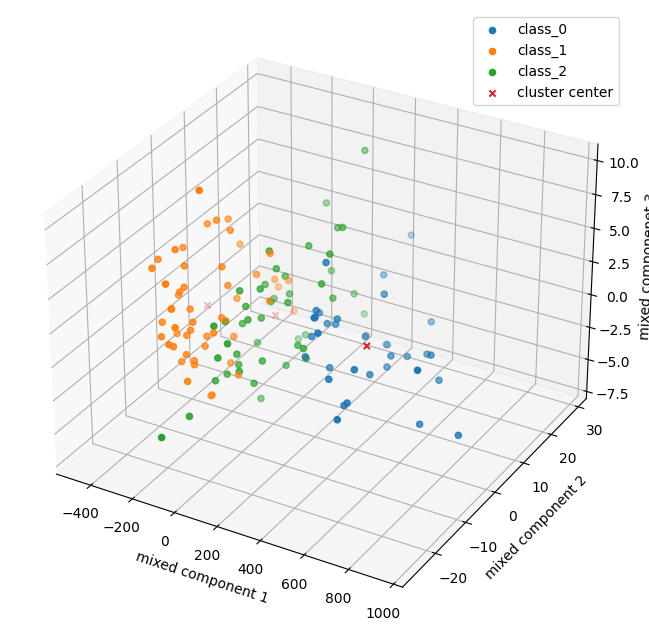

In [10]:
cluster_centers_pca = kmeans.cluster_centers_
print(cluster_centers_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for j in range(3):
    ax.scatter(X_train_pca[kmeans.labels_ == j, 0], X_train_pca[kmeans.labels_ == j, 1], X_train_pca[kmeans.labels_ == j, 2], label=f'class_{j}')
ax.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], cluster_centers_pca[:, 2], marker='x', label='cluster center')
ax.set_xlabel('mixed component 1')
ax.set_ylabel('mixed component 2')
ax.set_zlabel('mixed componenet 3')
ax.legend()
plt.show()

## 1.6

### Check accuracy of the model predictions on training and test datasets

In [11]:
X_test_pca = pca.fit_transform(X_test)
print(np.unique(kmeans.labels_))
print(np.unique(y_train))

[0 1 2]
[0 1 2]


K-means is unsupervised - we can not be sure that data's "0" label corresponds to kmeans's "0" label etc.

Examples of only one class as input and check if model returns only one class.

In [12]:
X_train_pca_0 = X_train_pca[y_train == 0]
X_train_pca_1 = X_train_pca[y_train == 1]
X_train_pca_2 = X_train_pca[y_train == 2]

kmeans_train_results_0 = kmeans.predict(X_train_pca_0)
kmeans_train_results_1 = kmeans.predict(X_train_pca_1)
kmeans_train_results_2 = kmeans.predict(X_train_pca_2)

train_0_count = Counter(kmeans_train_results_0)
train_1_count = Counter(kmeans_train_results_1)
train_2_count = Counter(kmeans_train_results_2)
print("1st class:",train_0_count)
print("2nd class:",train_1_count)
print("3rd class:",train_2_count)

1st class: Counter({0: 35, 2: 10})
2nd class: Counter({1: 38, 2: 13})
3rd class: Counter({2: 23, 1: 14})


In [13]:
print(f"Train data accuracy: {(np.max(list(train_0_count.values())) + np.max(list(train_1_count.values())) + np.max(list(train_2_count.values())))/ len(y_train) * 100:.2f}%")

Train data accuracy: 72.18%


In [14]:
X_test_pca = pca.fit_transform(X_test)

X_test_pca_0 = X_test_pca[y_test == 0]
X_test_pca_1 = X_test_pca[y_test == 1]
X_test_pca_2 = X_test_pca[y_test == 2]
kmeans_test_results_0 = kmeans.predict(X_test_pca_0)
kmeans_test_results_1 = kmeans.predict(X_test_pca_1)
kmeans_test_results_2 = kmeans.predict(X_test_pca_2)
test_0_count = Counter(kmeans_test_results_0)
test_1_count = Counter(kmeans_test_results_1)
test_2_count = Counter(kmeans_test_results_2)

print(f"Test data accuracy: {(np.max(list(test_0_count.values())) + np.max(list(test_1_count.values())) + np.max(list(test_2_count.values())))/ len(y_test) * 100:.2f}%")

Test data accuracy: 64.44%


Compare to k-nearest neighbours classification

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
neigh_train_result = neigh.predict(X_train_pca)
neigh_test_result = neigh.predict(X_test_pca)

print(f"Train data accuracy: {accuracy_score(y_train, neigh_train_result)*100:.2f}%")
print(f"Test data accuracy: {accuracy_score(y_test, neigh_test_result)*100:.2f}%")

Train data accuracy: 87.22%
Test data accuracy: 66.67%


# 2. Breast cancer dataset

### Features:

In [16]:
cancer_data = load_breast_cancer()
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

From kaggle.com:

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

## 2.1
### Consider wine data, split data into train and test datasets, use scikit-learn split method.

In [17]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.25)
print(len(cancer_X_train[0]))
print(cancer_X_train)
print(cancer_y_train)
len(cancer_y_train)

30
[[1.265e+01 1.817e+01 8.269e+01 ... 1.407e-01 3.230e-01 1.033e-01]
 [1.346e+01 1.875e+01 8.744e+01 ... 1.427e-01 3.518e-01 8.665e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.026e+01 1.222e+01 6.575e+01 ... 6.696e-02 2.937e-01 7.722e-02]
 [1.187e+01 2.154e+01 7.683e+01 ... 8.750e-02 2.305e-01 9.952e-02]
 [1.311e+01 1.556e+01 8.721e+01 ... 1.986e-01 3.147e-01 1.405e-01]]
[1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0
 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1

426

## 2.2

### Analyze data (plot relations between features 2D triangle plot)

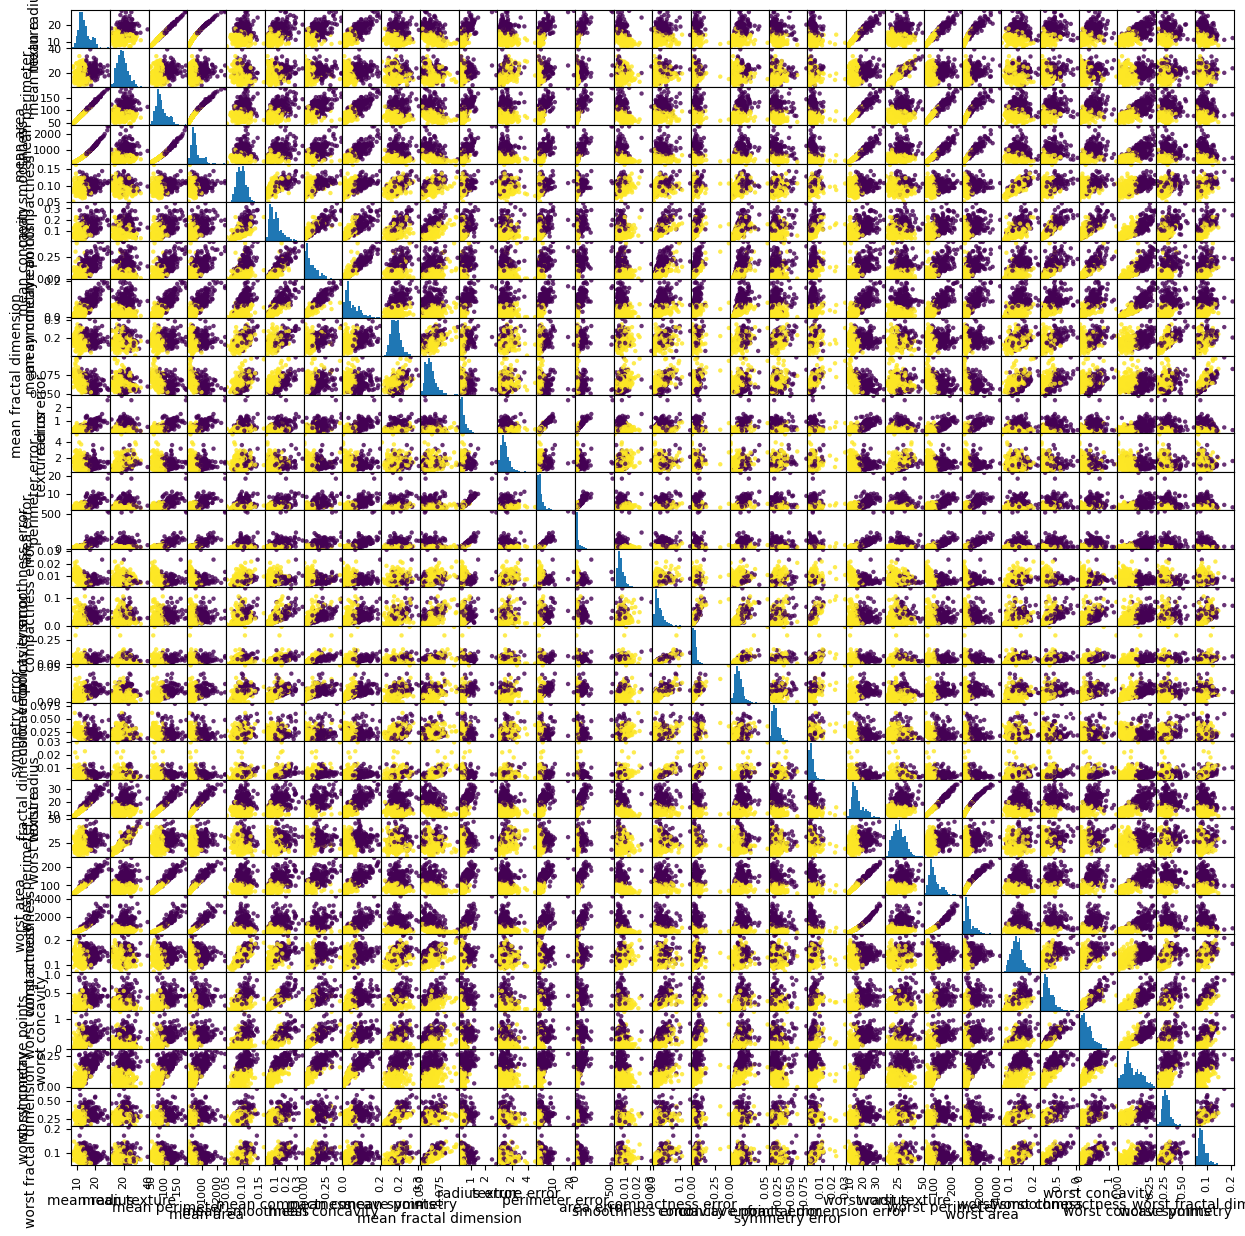

In [18]:
list_dataframe = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
alltogether = pd.plotting.scatter_matrix(list_dataframe, c = cancer_data.target, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=10,alpha=0.8)

## 2.3
### Plot3D of the samples, distingwish beteen three classes, consider various combinations of features.

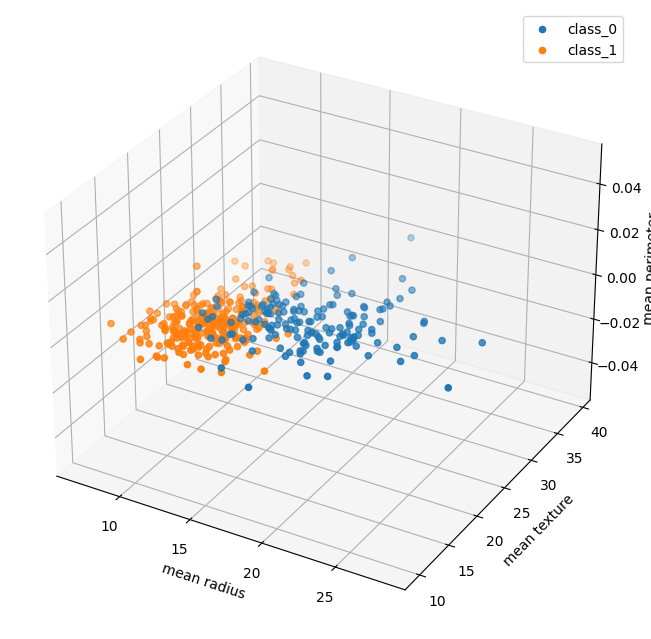

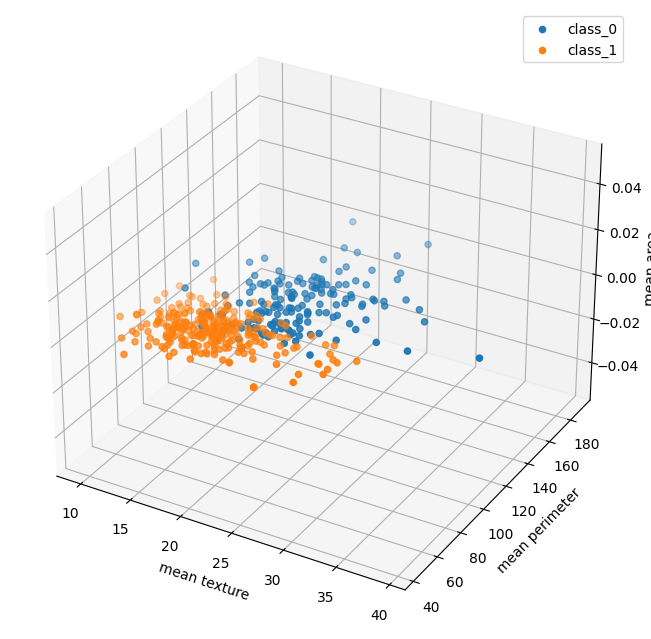

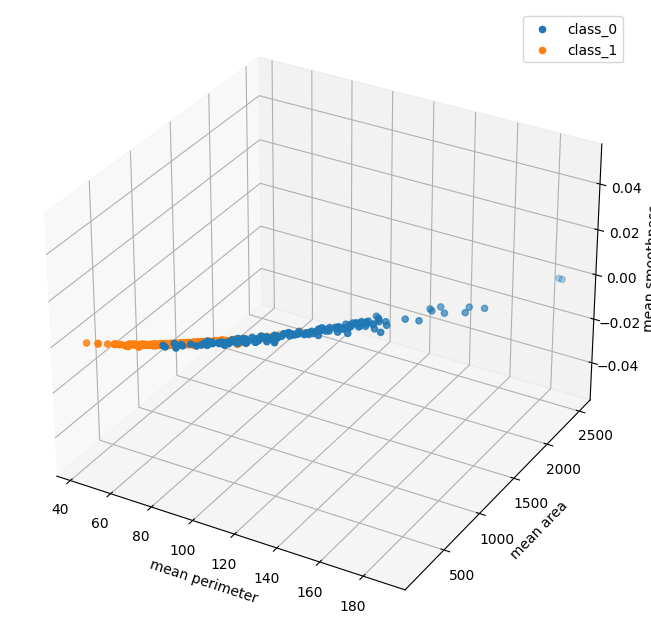

In [19]:
for i in range(3):
  fig = plt.figure(figsize=(8, 10))
  ax = fig.add_subplot(111, projection='3d')
  for j in range(2):
      ax.scatter(cancer_X_train[cancer_y_train == j, i], cancer_X_train[cancer_y_train == j, i+1], label=f'class_{j}')
  ax.set_xlabel(cancer_data.feature_names[i])
  ax.set_ylabel(cancer_data.feature_names[i+1])
  ax.set_zlabel(cancer_data.feature_names[i+2])
  ax.legend()
  plt.show()

In [30]:
fig = go.Figure()

for j in range(2):
    fig.add_trace(go.Scatter3d(
        x=cancer_X_train[cancer_y_train == j, 2],
        y=cancer_X_train[cancer_y_train == j, 3],
        z=cancer_X_train[cancer_y_train == j, 4],
        mode='markers',
        marker=dict(size=3),
        name=f'class_{j}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title=cancer_data.feature_names[2],
        yaxis_title=cancer_data.feature_names[3],
        zaxis_title=cancer_data.feature_names[4]
    )
)

fig.show()

## 2.4
### Use PCA and then plot 3D again.

In [21]:
pca = PCA(n_components=3)
cancer_X_train_pca = pca.fit_transform(cancer_X_train)
print("New shape:", cancer_X_train_pca.shape)

New shape: (426, 3)


In [22]:
fig = go.Figure()

for j in range(2):
    fig.add_trace(go.Scatter3d(
        x=cancer_X_train_pca[cancer_y_train == j, 0],
        y=cancer_X_train_pca[cancer_y_train == j, 1],
        z=cancer_X_train_pca[cancer_y_train == j, 2],
        mode='markers',
        marker=dict(size=3),
        name=f'class_{j}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title="mixed component 0",
        yaxis_title="mixed component 1",
        zaxis_title="mixed component 2"
    )
)

fig.show()

## 2.5
### Use K-mean algorithm for clustering the data.

In [23]:
kmeans2 = KMeans(n_clusters=2, n_init=10)
kmeans2.fit(cancer_X_train)
silh_score = silhouette_score(cancer_X_train, kmeans2.labels_)
print("Silhouette Score:", silh_score)

kmeans2 = KMeans(n_clusters=2, n_init =10)
kmeans2.fit(cancer_X_train_pca)
silh_score_pca = silhouette_score(cancer_X_train_pca, kmeans2.labels_)
print("Silhouette Score PCA:", silh_score_pca)

Silhouette Score: 0.7037170068840984
Silhouette Score PCA: 0.7040363604266858


[[ 1.03548628e+03  3.13070201e+00 -3.59064349e+00]
 [-3.01232371e+02 -9.10749676e-01  1.04455083e+00]]


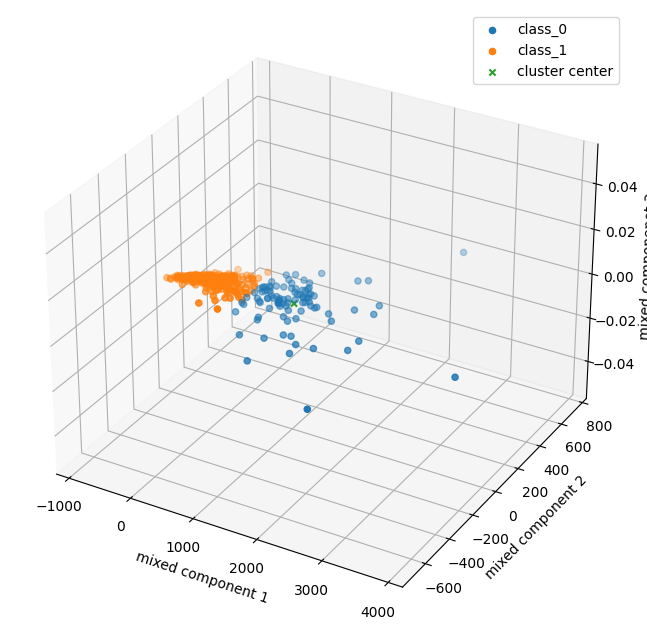

In [24]:
cluster_centers_pca = kmeans2.cluster_centers_
print(cluster_centers_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for j in range(2):
    ax.scatter(cancer_X_train_pca[kmeans2.labels_ == j, 0], cancer_X_train_pca[kmeans2.labels_ == j, 1], label=f'class_{j}')
ax.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', label='cluster center')
ax.set_xlabel('mixed component 1')
ax.set_ylabel('mixed component 2')
ax.set_zlabel('mixed componenet 3')
ax.legend()
plt.show()

## 2.6

### Check accuracy of the model predictions on training and test datasets

In [25]:
cancer_X_test_pca = pca.fit_transform(cancer_X_test)
print(np.unique(kmeans2.labels_))
print(np.unique(cancer_y_train))

[0 1]
[0 1]


In [26]:
cancer_X_train_pca_0 = cancer_X_train_pca[cancer_y_train == 0]
cancer_X_train_pca_1 = cancer_X_train_pca[cancer_y_train == 1]

kmeans2_train_results_0 = kmeans2.predict(cancer_X_train_pca_0)
kmeans2_train_results_1 = kmeans2.predict(cancer_X_train_pca_1)

train_0_count = Counter(kmeans2_train_results_0)
train_1_count = Counter(kmeans2_train_results_1)
print("1st class:",train_0_count)
print("2nd class:",train_1_count)

1st class: Counter({0: 95, 1: 67})
2nd class: Counter({1: 263, 0: 1})


In [27]:
print(f"Train data accuracy: {(np.max(list(train_0_count.values())) + np.max(list(train_1_count.values())))/ len(cancer_y_train) * 100:.2f}%")
print(f"Class 0 accuracy: {np.max(list(train_0_count.values())) / len(cancer_X_train_pca_0) * 100:.2f}%")
print(f"Class 1 accuracy: {np.max(list(train_1_count.values())) / len(cancer_X_train_pca_1) * 100:.2f}%")

Train data accuracy: 84.04%
Class 0 accuracy: 58.64%
Class 1 accuracy: 99.62%


In [28]:
cancer_X_test_pca = pca.fit_transform(cancer_X_test)

cancer_X_test_pca_0 = cancer_X_test_pca[cancer_y_test == 0]
cancer_X_test_pca_1 = cancer_X_test_pca[cancer_y_test == 1]
kmeans2_test_results_0 = kmeans2.predict(cancer_X_test_pca_0)
kmeans2_test_results_1 = kmeans2.predict(cancer_X_test_pca_1)

test_0_count = Counter(kmeans2_test_results_0)
test_1_count = Counter(kmeans2_test_results_1)

print(f"Test data accuracy: {(np.max(list(test_0_count.values())) + np.max(list(test_1_count.values())))/ len(cancer_y_test) * 100:.2f}%")
print(f"Class 0 accuracy: {np.max(list(test_0_count.values())) / len(cancer_X_test_pca_0) * 100:.2f}%")
print(f"Class 1 accuracy: {np.max(list(test_1_count.values())) / len(cancer_X_test_pca_1) * 100:.2f}%")

Test data accuracy: 88.81%
Class 0 accuracy: 68.00%
Class 1 accuracy: 100.00%


In [29]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(cancer_X_train_pca, cancer_y_train)
neigh_train_result = neigh.predict(cancer_X_train_pca)
neigh_test_result = neigh.predict(cancer_X_test_pca)

print(f"Train data accuracy: {accuracy_score(cancer_y_train, neigh_train_result)*100:.2f}%")
print(f"Test data accuracy: {accuracy_score(cancer_y_test, neigh_test_result)*100:.2f}%")

Train data accuracy: 95.31%
Test data accuracy: 84.62%
